## Домашнее задание 3 (10 баллов)

## НИУ ВШЭ, 2023-24 учебный год

## О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn, а также познакомитесь с plotly.

EDA - важный этап работы с данными. Именно в процессе EDA вы можете выяснить особенности датасета, найти зависимости в данных, протестировать гипотезы о взаимосвязях признаков и целевой переменной. В реальности вы сами будете определять, что и как проверять в рамках EDA, однако в данной работе гипотезы будут выдвинуты за вас автором задания. Также и типы графиков, которые вы будете использовать уже предопределены за вас. Выполняя задания по визуализациям, обращайте внимание на референсные картинки, которые были оставлены автором. Они показывают, какой примерно результат от вас ожидается.

Это задание будет включать в себя построение некоторого количества графиков, потому вот основные правила, в соответствии с которыми графики должны быть оформлены:
1. Любой график всегда имеет название.
2. Оси у графика подписаны (исключение - график делит название оси с соседним).
3. Подписи делаются на одном языке (либо английский, либо русский), но не на их смеси.
4. Если вы выводите несколько графиков, то они размещаются в рамках одного объекта matplotlib.pyplot.figure. Вы не выводите графики последовательно, а смотрите, как их разместить сразу все за раз.
5. Отдельные графики (если графиков на картинке больше 1) также имеют свои названия.
6. Если на графике есть несколько различных объектов, то для их различения используется легенда. Помещайте легенду в место, где она в наименьшей мере мешает восприятию самого графика.
7. Если есть легенда, то она должна иметь навание, а также ее содержание должно быть адекватными (пожалейте проверяющих, они не хотят разбирать, а к чему относится зеленая линия, которая на легенде помечена меткой "0").
8. Используйте цветовые гаммы, чтобы объекты на графиках отличались цветом.
9. Текст на визуализации должен быть читаем. Если вы вывели названия категорий в качестве подписей на оси Х, а эти названия наезжают друг на друга, то вам нужно что-то с этим сделать. Нечитаемый или плохо читаемый (очень маленький, невероятно огромный) текст ведет к снижению баллов.

*Тут правило про плагиат, которое вам итак известно - обнуляются все работы, которые подозреваются в некорректных заимствованиях!* Помните, что просто скопировать код из интернета и указать источник - это не ваша самостоятельная работа, а автора кода. Измените хоть что-нибудь в коде.

## О данных

Будем работать с [датасетом физической активности](https://www.kaggle.com/datasets/uciml/human-activity-recognition-with-smartphones).

В этом датасете собраны данные 30 человек, выполняющих различные действия со смартфоном на поясе. Данные записывались с помощью датчиков (акселерометра и гироскопа) в этом смартфоне. Были зафиксированы: "3-осевое линейное ускорение" (_tAcc-XYZ_) и "3-осевая угловая скорость" (_tGyro-XYZ_).

1. Все сигналы отсортированы по времени, пропущены через фильтр шума.
2. Все наблюдения были разделены на окна по 128 сигналов в каждом, причем окна пересекаются на 50% (грубо говоря, с 1 по 128 сигнал в 1 окно, с 64 до 192 сигнала - во 2 окно и так далее).
3. Линейное ускорение было разделено на две составляющие (с помощью низкочастотного фильтра): ускорение самого тела, а также гравитационная составляющая. Будем называть их ускорением тела и гравитационным ускорением.
4. К получившимся окнам применяли различные функции для получения следующих показателей:
    - max
    - min
    - mad (median)
    - mean
    - std
    - skewness (коэффициент асимметричности распределения признака в окне)
    - etc. (подробнее, на сколько это возможно, указано на [страничке датасета](https://archive.ics.uci.edu/dataset/240/human+activity+recognition+using+smartphones))
5. Величина (magnitude) сигнала также определялась через евклидову норму всех значений из вектора для одного окна.
6. К окнам было применено преобразование Фурье, чтобы получить частоты. Из частот были извелченыте же показатели, плюс новые:
    - bandsEnergy (энергия частотного интервала)
7. Были посчитаны углы между векторами соответствующих окон.
8. Для ускорений были посчитаны производные - рывки, к которым применялись те же функции.

Итог: в датасете каждый признак - это какая-то операция над вектором из 128 чисел, которые соответствуют замерам определенного человека занятого какой-то активностью на протяжении 2.56 секунд.

Как читать названия признаков? Примеры:
- `tBodyAccMag-mean()` - это вектор ускорений тела (без гравитационной составляющей этого ускорения), из которого взяли евклидову норму, а затем усреднили, чтобы получить скаляр
- `fBodyAcc-bandsEnergy()-1,8.2` - это вектор ускорения тела, к которому применили преобразование Фурье, преобразовав его в вектор частот, а затем посчитали на этом векторе энергию данного частотного интервала в определенном диапазоне частот (в данном случае 1 - 8.2)
- `angle(X,gravityMean)` - это угол между осью Х и вектором усредненных значений гравитационного ускорения из соответствующего окна

Вероятно, сначала покажется сложным, но мы разберемся с некоторыми признаками в отдельности и вы сможете понять их смысл, уже исходя из фактических соотношений.

## Предобработка данных

In [1]:
!wget "https://github.com/artemkumin1/eda/raw/main/archive%20(3).zip"

--2024-02-29 20:38:48--  https://github.com/artemkumin1/eda/raw/main/archive%20(3).zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/artemkumin1/eda/main/archive%20(3).zip [following]
--2024-02-29 20:38:48--  https://raw.githubusercontent.com/artemkumin1/eda/main/archive%20(3).zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25693584 (25M) [application/zip]
Saving to: ‘archive (3).zip’

archive (3).zip     100%[===================>]  24.50M   149MB/s    in 0.2s    

2024-02-29 20:38:48 (149 MB/s) - ‘archive (3).zip’ saved [25693584/25693584]



In [2]:
!unzip "/content/archive (3).zip"

Archive:  /content/archive (3).zip
  inflating: test.csv                
  inflating: train.csv               


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv("test.csv")

In [5]:
train.shape

(7352, 563)

В датасете 563 признака, включая целевую переменную. Столько признаков нам не нужно. Мы за вас сделали подвыборку признаков для удобства работы с ними.

In [6]:
cols_subset = [
    'tBodyAccMag-mean()',  # усредненная величина ускорения тела
    'tBodyGyroJerk-mad()-X',  # медианная величина рывка тела по оси Х
    'tGravityAcc-min()-X',  # минимум гравитационной составляющей ускорения по оси Х
    'tBodyAcc-max()-X',  # максимальная величина ускорения тела по оси Х
    'fBodyAcc-bandsEnergy()-1,8.2',  # энергия ускорения тела в интервале частоты
    'angle(X,gravityMean)',  # угол между осью Х и усредненной гравитационной составляющей ускорения
    'angle(Y,gravityMean)',  # угол между осью Y и усредненной гравитационной составляющей ускорения
    'angle(Z,gravityMean)',  # угол между осью Z и усредненной гравитационной составляющей ускорения,
    'fBodyAcc-skewness()-X',  # асимметричность частоты ускорения тела по оси Х
    'subject',  # номер испытуемого
    'Activity',  # название вида деятельности (целевая переменная)
]

In [7]:
train = train[cols_subset]
test = test[cols_subset]

### Задание 1 (0.5 балла)

Посмотрите на пропуски и дубли в данных train и test. Есть ли они? Если есть, напишите, с чем это может быть связано? Если нет, то просто напишите, что пропусков и/или дублей нет.

In [8]:
train.isnull().any().any()


False

In [9]:
train.duplicated().value_counts()

False    7352
dtype: int64

In [10]:
test.isnull().any().any()

False

In [11]:
test.duplicated().value_counts()

False    2947
dtype: int64

Пропусков и дублей нет

### Задание 2 (0.5 балла)

Выведите основные статистики данных: среднее, медиана, перцентили (0.25, 0.5, 0.75), минимум, максимум, стандартное отклонение. Посмотрите на таблицу и напишите, видите ли вы в ней что-нибудь интересное.

In [12]:
train.describe().drop(['count'])
#посмотрев на таблицу сложно заметить в ней что-то интересное, так как специфики данных достаточно слонжа для обычного обывателя,
#однако монжо увидеть, что практически все значния в строке max равны 1 кроме angle(Y,gravityMean), а в строке min все значения примерно равны -1

tBodyAccMag-mean()  tBodyGyroJerk-mad()-X  tGravityAcc-min()-X  \
mean           -0.543884              -0.727735             0.678505   
std             0.477653               0.315832             0.508656   
min            -1.000000              -0.999889            -1.000000   
25%            -0.983282              -0.991595             0.804270   
50%            -0.883371              -0.950268             0.926693   
75%            -0.106892              -0.474625             0.965095   
max             1.000000               1.000000             1.000000   

      tBodyAcc-max()-X  fBodyAcc-bandsEnergy()-1,8.2  angle(X,gravityMean)  \
mean         -0.468604                     -0.847963             -0.489547   
std           0.544547                      0.233633              0.511807   
min          -1.000000                     -1.000000             -1.000000   
25%          -0.936219                     -0.999480             -0.812065   
50%          -0.881637                     -0.986582             -0.709417   
75%          -0.017129                     -0.764508             -0.509079   
max           1.000000                      1.000000              1.000000   

      angle(Y,gravityMean)  angle(Z,gravityMean)  fBodyAcc-skewness()-X  \
mean              0.058593             -0.056515              -0.128562   
std               0.297480              0.279122               0.403686   
min              -1.000000             -1.000000              -0.931208   
25%              -0.017885             -0.143414              -0.486841   
50%               0.182071              0.003181              -0.163271   
75%               0.248353              0.107659               0.155112   
max               0.478157              1.000000               1.000000   

        subject  
mean  17.413085  
std    8.975143  
min    1.000000  
25%    8.000000  
50%   19.000000  
75%   26.000000  
max   30.000000

### Задание 3 (0.5 балла)

Данные сбалансированы? У вас есть 6 категорий активности (целевая переменная). Если одна из категорий представлена большим количеством наблюдений, а остальные - нет, то это обстоятельство, о котором хотелось бы знать заранее. Гиперболизированный пример: представьте, что у вас 1000 наблюдений, разделенных на два класса, и только 5 принадлежат ко второму классу. Как учить модель на такой выборке? Есть сильное подозрение, что многие модели будут склонны вырождаться в константу. Отсюда и необходимость проверять баланс классов.

Выведите количество наблюдений для всех категорий активности в train и test. Посчитайте разницу в процентах между самой крупной категорией и самой маленькой (самая большая категория - это 100%). Если разница (округленная до ближайшего целого числа) не превышает 30%, то давайте для наших целей считать, что данные сбалансированы. Напишите, сбалансированы ли данные в train и test.

In [13]:
train['Activity'].value_counts()

LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: Activity, dtype: int64

In [14]:
a=(train['Activity'].value_counts().max()-train['Activity'].value_counts().min())/train['Activity'].value_counts().max()
round(a*100)
# так как не превышает 30%, то данные сбалансированы


30

In [15]:
test['Activity'].value_counts()

LAYING                537
STANDING              532
WALKING               496
SITTING               491
WALKING_UPSTAIRS      471
WALKING_DOWNSTAIRS    420
Name: Activity, dtype: int64

In [16]:
a=(test['Activity'].value_counts().max()-test['Activity'].value_counts().min())/test['Activity'].value_counts().max()
round(a*100)
# так как не превышает 30%, то данные сбалансированы

22

### Задание 4 (0.5 балла)

Посчитайте корреляции всех признаков (включая таргет) со всеми другими. Какими получились значения? Есть идеи, почему так? Напишите ваши мысли.

In [17]:

one_hot_encoded = pd.get_dummies(train['Activity'])
one_hot_encoded
train_new=pd.concat([train,one_hot_encoded],axis=1)
train_new.corr()

 # стоит заметить, что данный график хорошо помогает понять линейную зависимость между некоторыми данными к примеру очевидно, что корреляция одинаковых переменных с пометкой mean и max близка к 1
 # так же видна зависимость между видами активностей и данными(ускорение, угол при лежании и тд.), например можно сдлеать вывод что действие WALKING_DOWNSTAIRS напрямую
 #связяано с переменными показывающими ускорение(далее в заданиях мной это объясняется)

tBodyAccMag-mean()  tBodyGyroJerk-mad()-X  \
tBodyAccMag-mean()                      1.000000               0.899080   
tBodyGyroJerk-mad()-X                   0.899080               1.000000   
tGravityAcc-min()-X                     0.369962               0.380118   
tBodyAcc-max()-X                        0.959827               0.879900   
fBodyAcc-bandsEnergy()-1,8.2            0.697832               0.507939   
angle(X,gravityMean)                   -0.370849              -0.382246   
angle(Y,gravityMean)                    0.495561               0.478567   
angle(Z,gravityMean)                    0.426283               0.380967   
fBodyAcc-skewness()-X                   0.379796               0.266002   
subject                                -0.073652              -0.110321   
LAYING                                 -0.396643              -0.386730   
SITTING                                -0.396389              -0.379403   
STANDING                               -0.414460              -0.370699   
WALKING                                 0.358825               0.531695   
WALKING_DOWNSTAIRS                      0.561344               0.445048   
WALKING_UPSTAIRS                        0.405434               0.257524   

                              tGravityAcc-min()-X  tBodyAcc-max()-X  \
tBodyAccMag-mean()                       0.369962          0.959827   
tBodyGyroJerk-mad()-X                    0.380118          0.879900   
tGravityAcc-min()-X                      1.000000          0.380404   
tBodyAcc-max()-X                         0.380404          1.000000   
fBodyAcc-bandsEnergy()-1,8.2             0.239088          0.613383   
angle(X,gravityMean)                    -0.988663         -0.384192   
angle(Y,gravityMean)                     0.797116          0.480229   
angle(Z,gravityMean)                     0.667415          0.405023   
fBodyAcc-skewness()-X                   -0.261676          0.335708   
subject                                 -0.042371         -0.055633   
LAYING                                  -0.973167         -0.394745   
SITTING                                  0.187055         -0.387297   
STANDING                                 0.262354         -0.399861   
WALKING                                  0.234820          0.298526   
WALKING_DOWNSTAIRS                       0.192409          0.658369   
WALKING_UPSTAIRS                         0.159741          0.347429   

                              fBodyAcc-bandsEnergy()-1,8.2  \
tBodyAccMag-mean()                                0.697832   
tBodyGyroJerk-mad()-X                             0.507939   
tGravityAcc-min()-X                               0.239088   
tBodyAcc-max()-X                                  0.613383   
fBodyAcc-bandsEnergy()-1,8.2                      1.000000   
angle(X,gravityMean)                             -0.213318   
angle(Y,gravityMean)                              0.363170   
angle(Z,gravityMean)                              0.423927   
fBodyAcc-skewness()-X                             0.260316   
subject                                          -0.037000   
LAYING                                           -0.287395   
SITTING                                          -0.276766   
STANDING                                         -0.296141   
WALKING                                           0.189834   
WALKING_DOWNSTAIRS                                0.217399   
WALKING_UPSTAIRS                                  0.534750   

                              angle(X,gravityMean)  angle(Y,gravityMean)  \
tBodyAccMag-mean()                       -0.370849              0.495561   
tBodyGyroJerk-mad()-X                    -0.382246              0.478567   
tGravityAcc-min()-X                      -0.988663              0.797116   
tBodyAcc-max()-X                         -0.384192              0.480229   
fBodyAcc-bandsEnergy()-1,8.2             -0.213318              0.363170   
angle(X,gravityMean)               

Поздравляем! Вы предобработали данные для максимально комфортного их последующего анализа. Теперь вы готовы приступить к Exploratory Data Analysis!

## Exploratory Data Analysis

### Задание 5 (0.5 балла)

Вы проверили основную информацию о данных и составили свое первое впечатление о них. Теперь визуализации.

Начнем рисовать графики с небольшой разминки. Выберите две любые математические функции (отличные от линейной) и нарисуйте их на одном графике. Подпишите каждый из графиков, чтобы было понятно, какие функции вы выбрали. Ниже будет пример.

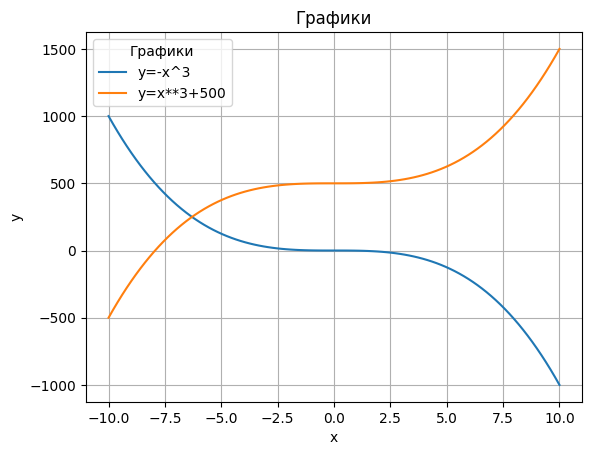

In [18]:
x = np.linspace(-10, 10, 100)
y =-x**3
y1=x**3+500
plt.plot(x, y,label='y=-x^3')
plt.plot(x,y1,label='y=x**3+500')
plt.grid(True)
plt.legend(title="Графики")
plt.title('Графики')
plt.xlabel('x')
plt.ylabel('y')


plt.show()


### Задание 6 (0.5 балла)

Ранее мы уже проверили сбалансированность данных по разным категориям активностей в train и test сетах. Теперь визуализируйте количество сэмплов в каждой из категорий отдельно для train и test сетов, как в примере ниже. Проследите, чтобы порядок категорий слева и справа был одинаков. Иначе не очень удобно их сравнивать (когда они в разных местах двух графиков). Также заметьте, что в примере ось Х в одинаковом масштабе, что тоже удобно для сравнения.

Вам может пригодиться:
- plt.barh или ax.barh

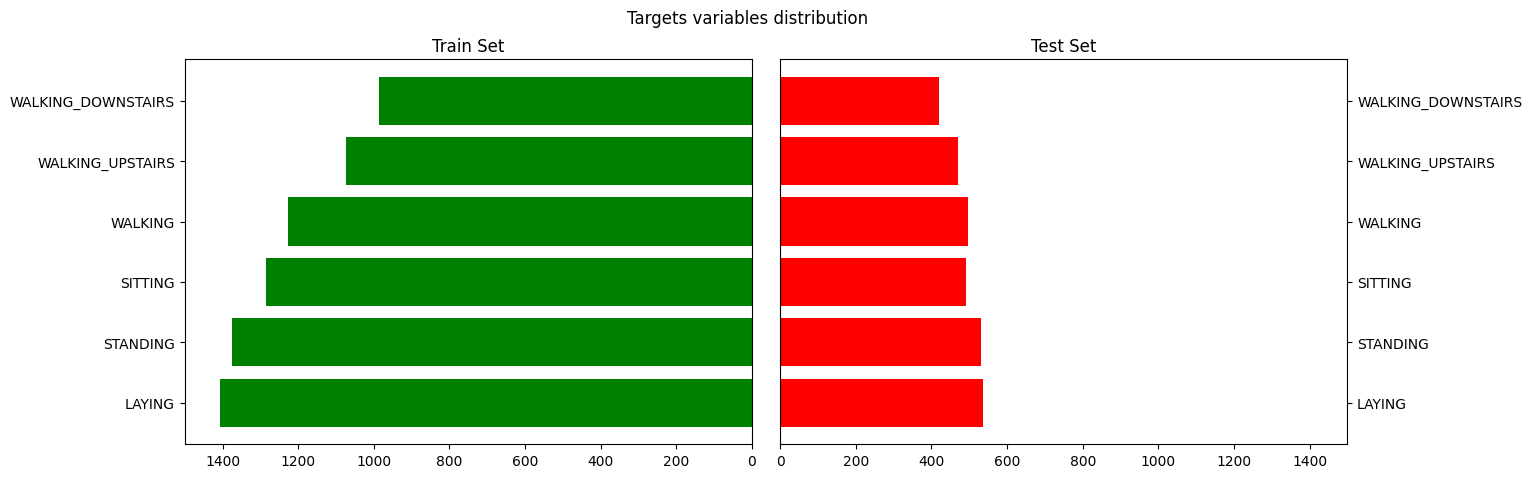

In [20]:

fig, axs = plt.subplots(nrows=1,ncols= 2,figsize=(15, 5))
plt.subplots_adjust(wspace=0.05)


count1 = train['Activity'].value_counts()
count2 = test['Activity'].value_counts()

desired_order = ["LAYING", "STANDING", "SITTING", "WALKING", "WALKING_UPSTAIRS", "WALKING_DOWNSTAIRS"]

axs[0].set_xlim(0,1500)
axs[1].set_xlim(0,1500)
axs[0].set_xticks(np.arange(0, 1500, 200))
axs[1].set_xticks(np.arange(0, 1500, 200))

axs[0].barh(count1.index, count1, color="g")
axs[0].invert_xaxis()
axs[1].barh(desired_order, count2[desired_order], color="r")
axs[1].yaxis.tick_right()

axs[0].set_title('Train Set')
axs[1].set_title('Test Set')

fig.suptitle('Targets variables distribution')
plt.show()









# проверять баланс таргета действительно проще


Правда на таких графиках проще проверять баланс классов таргета?)

### Задание 7 (0.5 балла)

Ранее вы выводили таблицу корреляций. Однако просто таблица корреляций не очень удобна для анализа. Что, если признаков было бы больше? Визуализируйте heatmap корреляций. Подпишите значения корреляций, округленные до 2 знаков после запятой, на графике и оставьте только те значения, которые по модулю не меньше 0.5. Будем считать такие корреляции существенными. Если будете брать код из семинарского ноутбука, то поменяйте в нем что-нибудь, например, цветовую гамму, иначе проверяющий будет карать :)

Какой признак стоит исключить из рассмотрения корреляций? Напишите его название, а также причину, почему нет смысла его рассматривать.

Вам может пригодиться:
- sns.heatmap
- методы get_text и set_text у атрибута texts графика

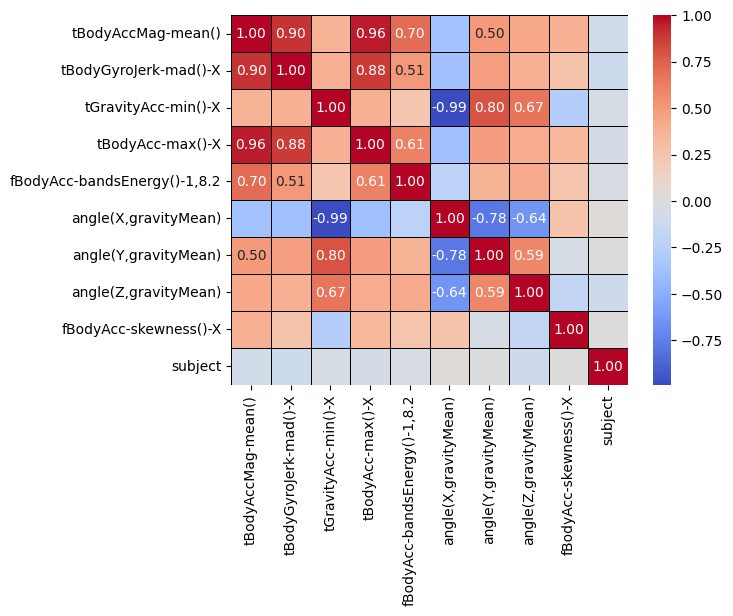

In [21]:
ax = sns.heatmap(train.corr(), cmap="coolwarm", annot=True, fmt="0.2f",linewidths=0.5, linecolor='black')
for t in ax.texts:
    if float(t.get_text()) >= 0.5 or float(t.get_text()) <= -0.5:
        t.set_text(t.get_text())
    else:
        t.set_text("")

# исключить стоит признак subject, представляющий из себя номер испытуемого, потому что он является уникальным индетифекатором,
# который никак не влияет на полученные в результате эксперимента данные(можем увидеть на hitmape, что корелляция этого признака со всеми отсальными(кроме себя) приблизительно равна 0)

### Задание 8 (0.5 балла)

Для начала будем стрелять из пушки по воробьям. Выведите pairplot по всем данным train сета. Напишите, заметили ли вы в нем что-нибудь интересное, чего не было в таблицах и графиках ранее, а также сообщите, было ли вам удобно анализировать 100 графиков.

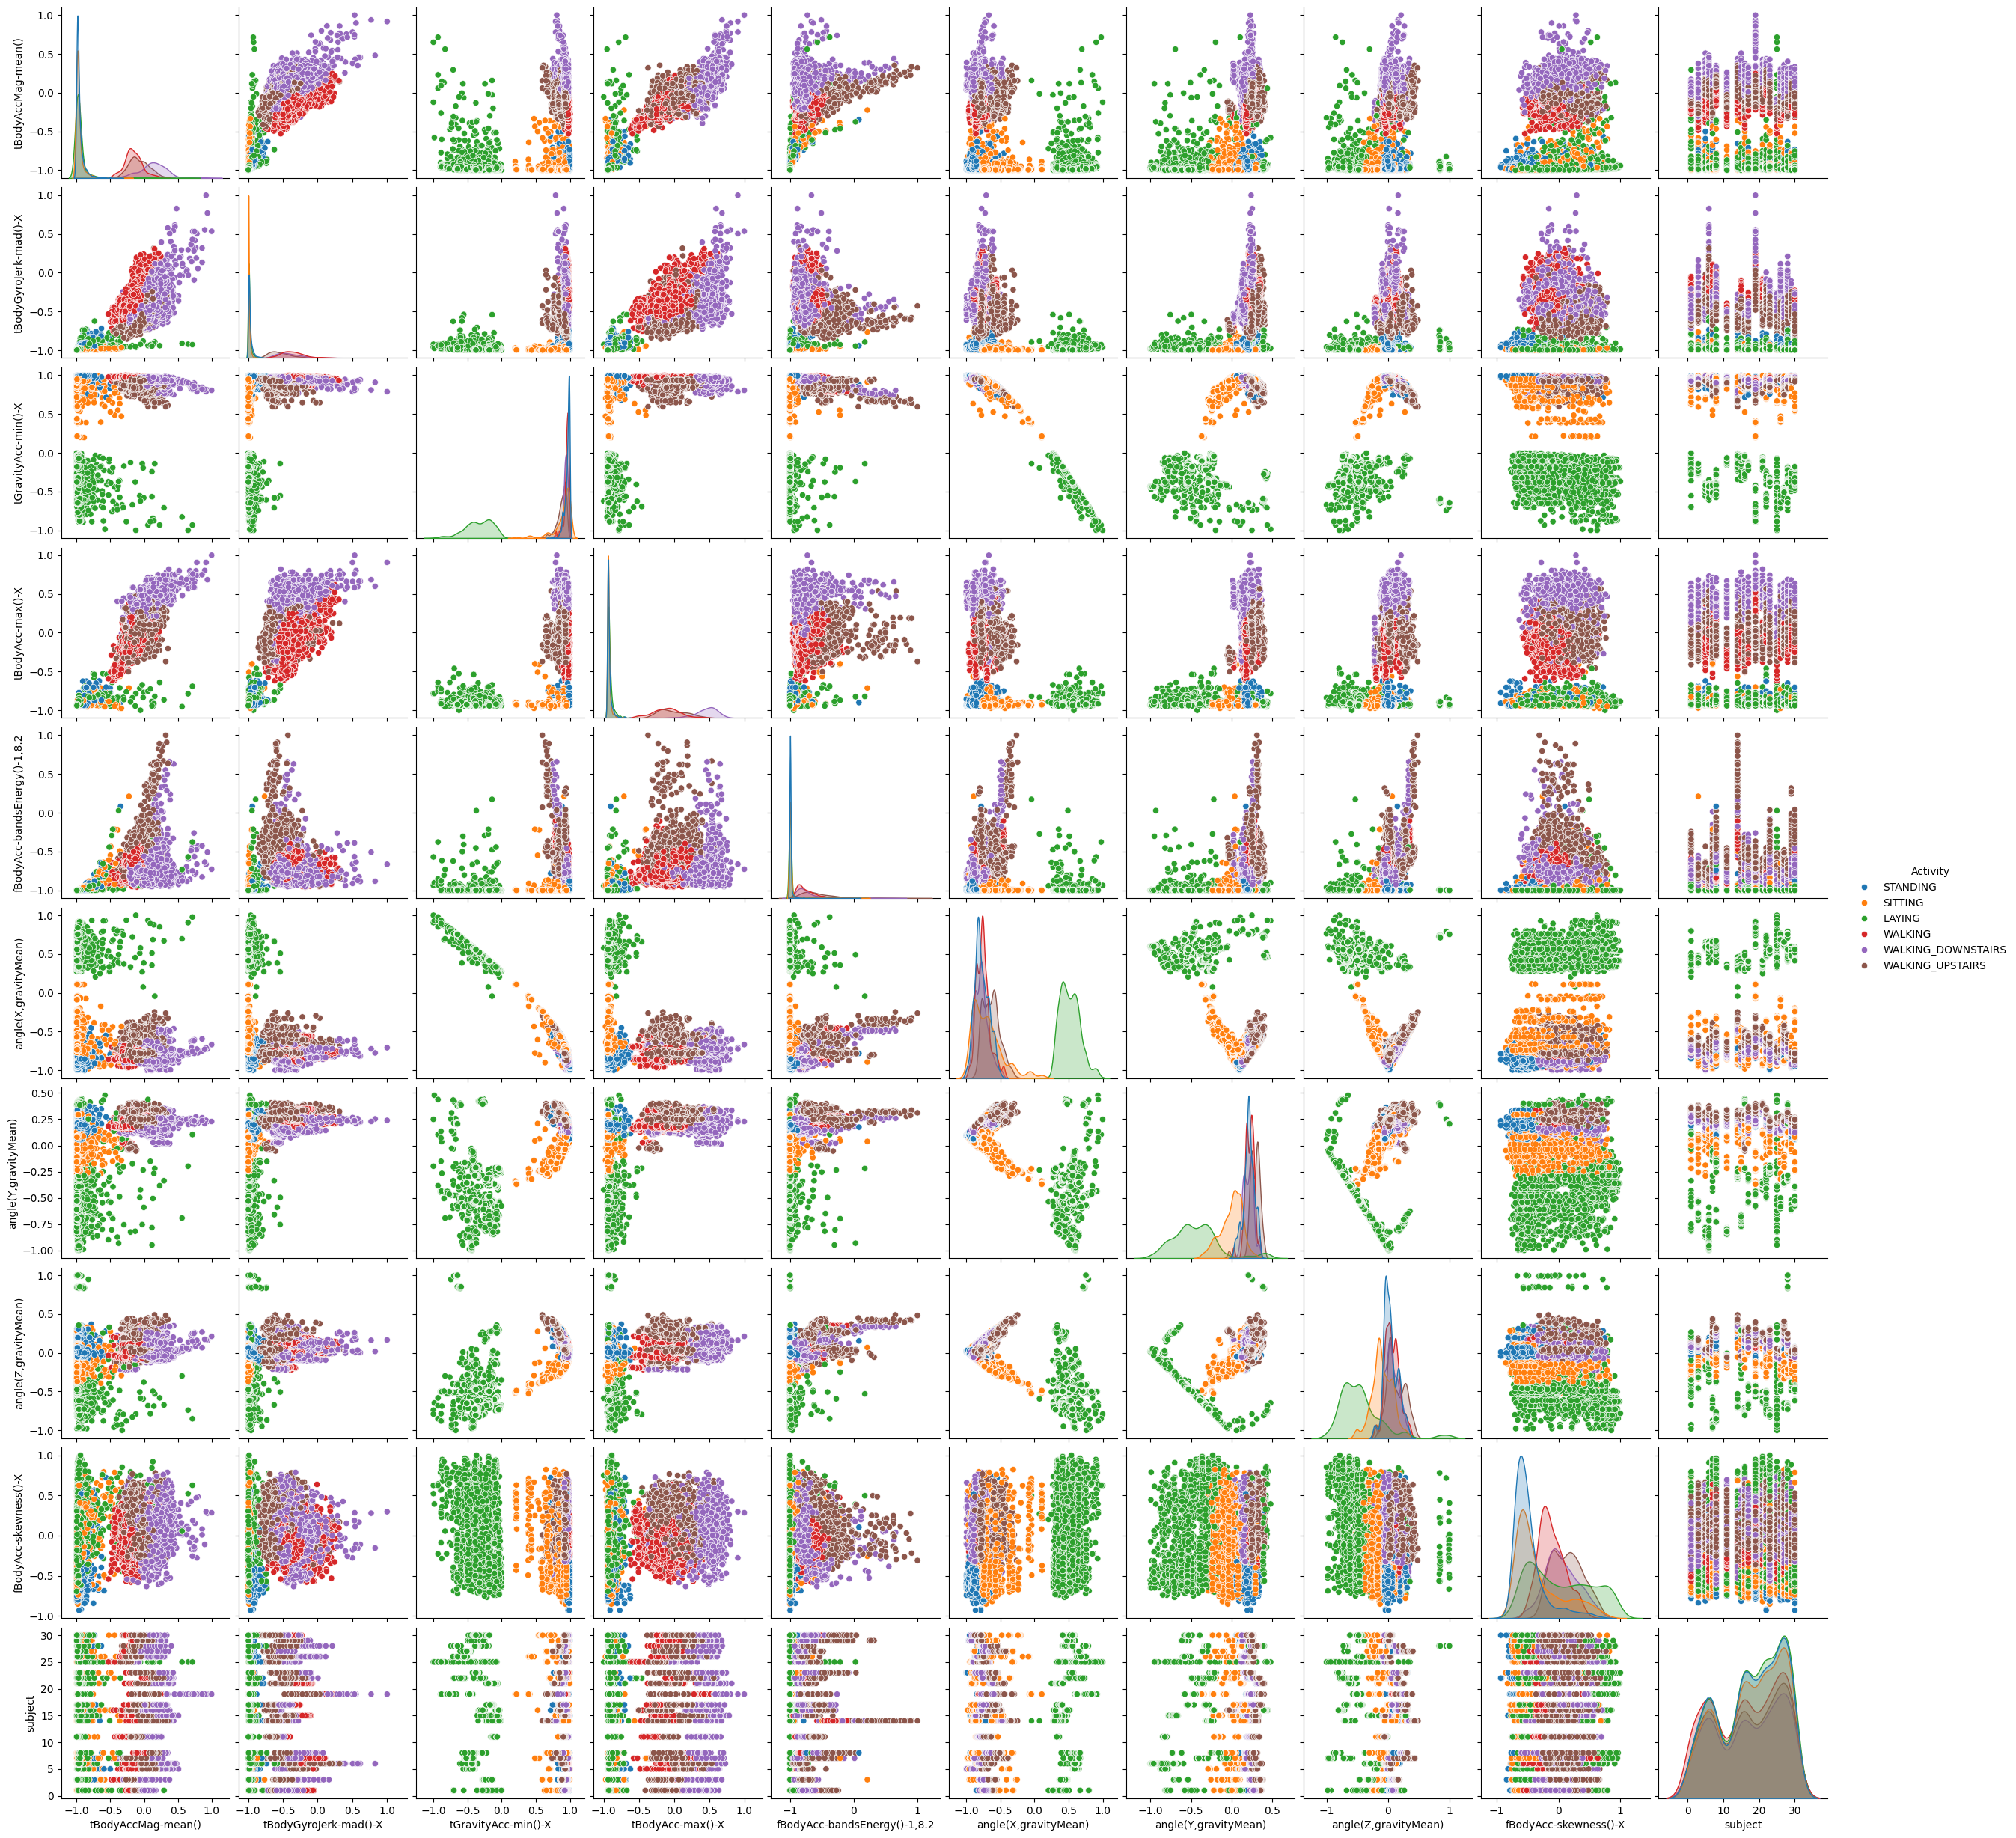

In [23]:
sns.pairplot(train,hue='Activity')
# на 100 графиках очень тяжело что-то заметить интересное
# хотя pairplot помог мне увидеть различные нелинейный завсимости данных (параболлические(одна из веток пароболы с ветвями вниз) и тд)
plt.show()

### Задание 9 (1 балл)

Окей. Смотреть на все сразу не очень удобно. Кажется, нужно смотреть на признаки в отдельности и искать в них инсайты.

Попробуем проверить гипотезу. Отобразите плотность распределения (kde) `tBodyAccMag-mean()` для каждой из активностей, как в примере ниже. Видите закономерность? Можно ли поделить все активности на две группы? Если да, то проведите вертикальную линию, которая визуально неплохо разделяет эти группы.

Давайте первую группу называть статическими активностями, а вторую - динамическими.

Посчитайте, какую долю правильных ответов дает ваша вертикальная линия для разделения именно этих двух групп. С чем может быть связан полученный вами результат? Предположите логическое обоснование (почему именно данный признак так хорошо/плохо разделяет группы активностей).

Вам может пригодиться:
- sns.kdeplot

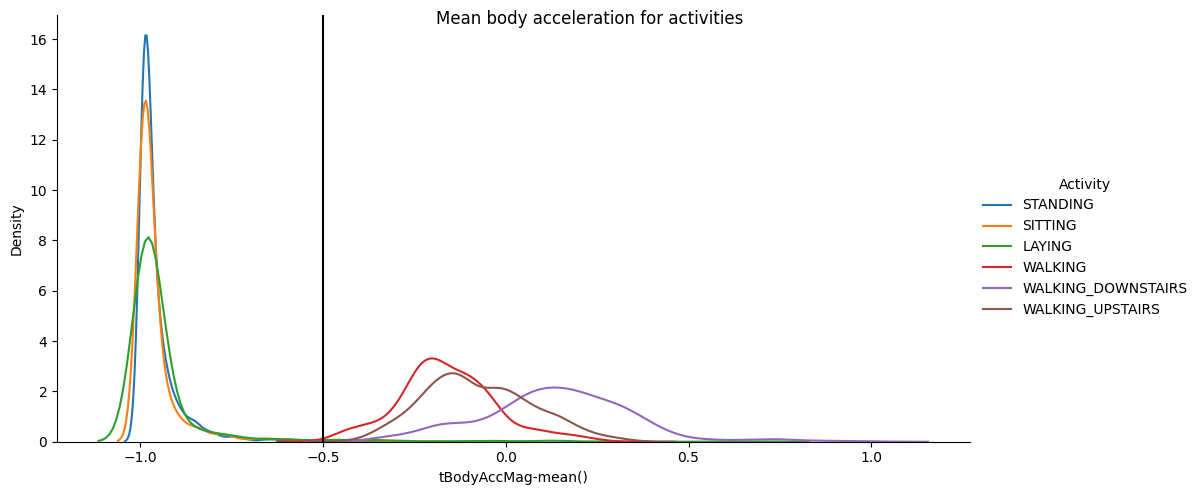

In [24]:
facet = sns.FacetGrid(data=train, hue="Activity", legend_out=True, height=5, aspect=2)
facet = facet.map(sns.kdeplot, "tBodyAccMag-mean()")

facet.add_legend(fontsize=10)
facet.fig.suptitle("Mean body acceleration for activities")
ax1= facet.axes[0,0]
ax1.axvline(x = -0.5,color='black')

plt.show()


In [25]:
a=((train['tBodyAccMag-mean()']>=-0.5) & (train['Activity'].isin (["WALKING_DOWNSTAIRS",'WALKING','WALKING_UPSTAIRS']))).sum()
b=(train['Activity'].isin (["WALKING_DOWNSTAIRS",'WALKING','WALKING_UPSTAIRS'])).sum()
answer=(a/b)*100
answer
#очень хорошая точность
# данный признак а именно среднее усокрение прекрасно помогает разделять данные, так как очевидно, что при выполнении статических активностей ускорение человека будет отрицательным(
#так как скорость человека уменьшается), в то время как ускорении большее илитравное -0.5присуще активным действиям так как скорость либо уменьшается немного(подъем по лестнице) либо возрастает(спуск по лестнице по инерции)


99.96955859969559

### Задание 10 (0.5 балла)

Поздравляем, вы проверили первую гипотезу в процессе EDA. Однако нам бы хотелось уметь не группы разделять, а каждый отдельный вид активности. Попробуйте нарисовать "ящики с усами" для `angle(X,gravityMean)` с разделением по разным видам активности на данных train. Можно ли сделать какой-то вывод по полученной визуализации? Проанализируйте и проинтерпретируйте полученные картинки (если заметили какую-то особенность, может какая-то категория значительно выделяется, то предположите, почему так могло произойти).

Вам может пригодиться:
- sns.boxplot

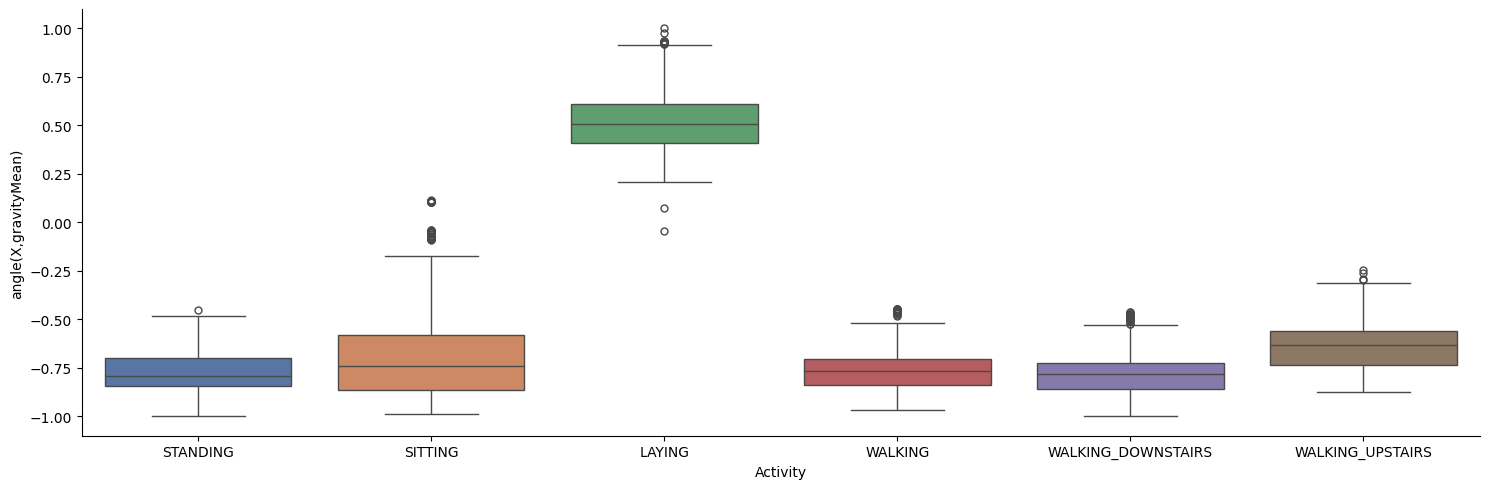

In [26]:
sns.catplot(x="Activity", y="angle(X,gravityMean)", data=train, kind="box", height=5, aspect=3,palette="deep")
plt.show()
# несомненно выделяется значения угла относительно оси х для действия лежать, так как при положении лежа угол человека значительно отличается от других положений(зеленый ящик с усами)

### Задание 11 (0.5 балла)

Посмотрим теперь на `tBodyAcc-max()-X`. Визуализируйте скрипичные диаграммы для этого признака с разделением по активностям на всем train. Кажется логичным, что максимальное ускорение в моменте для разных активностей будет различаться. Однако есть ли активность, которая будет выделяться? Если да, то предложите объяснение, почему эта активность выделяется.

Вам может пригодиться:
- sns.violinplot

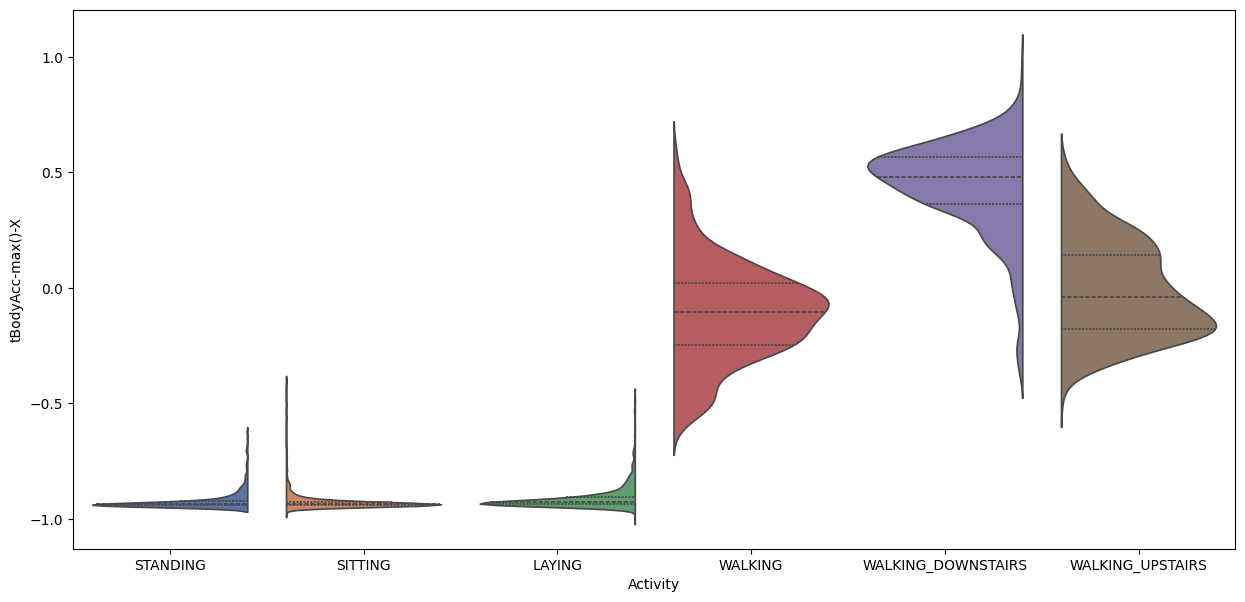

In [28]:
 fig = plt.subplots(figsize=(15, 7))
 sns.violinplot(x="Activity", y="tBodyAcc-max()-X", data=train,palette="deep",inner="quartile",split=True)
 # заметим, при активности Walking_downstairs максимальное положительное ускорение(когда скорость увеличивается) наибольшее среди всех других активностей
 #(графики для сидячих активностей находятся примерно на одном уровне, а также графики для хождения и поднимания вверх по ступенькам). Связано это с тем, что
 # при спуске из-за дейстия силы тяжести человек по инерции начинает ускоряться.
 plt.show()



### Задание 12 (1 балл)

Вы уже можете с довольно хорошим качеством выделить две категории активности из шести. Продолжим.

Ранее уже упоминалось разделение на две группы активностей: статические и динамические. Пришла пора разделить датасет train на две части. Сделайте это! Теперь на одной картинке покажите распределения `fBodyAcc-bandsEnergy()-1,8.2` для динамичных активностей (boxenplot - немного измененый "ящик с усами") и `angle(Y,gravityMean)` для статических - тут хватит и простой гистограммы (прямо, как в примере ниже). Можно ли выделить еще какие-то активности? Если да, напишите, какие активности на 1 и 2 графиках выделяются.

Вам может пригодиться:
- plt.subplots или matplotlib.gridspec (заметили, что один график больше другого? попробуйте сами так сделать - вам понравится...)
- sns.boxenplot
- sns.histplot

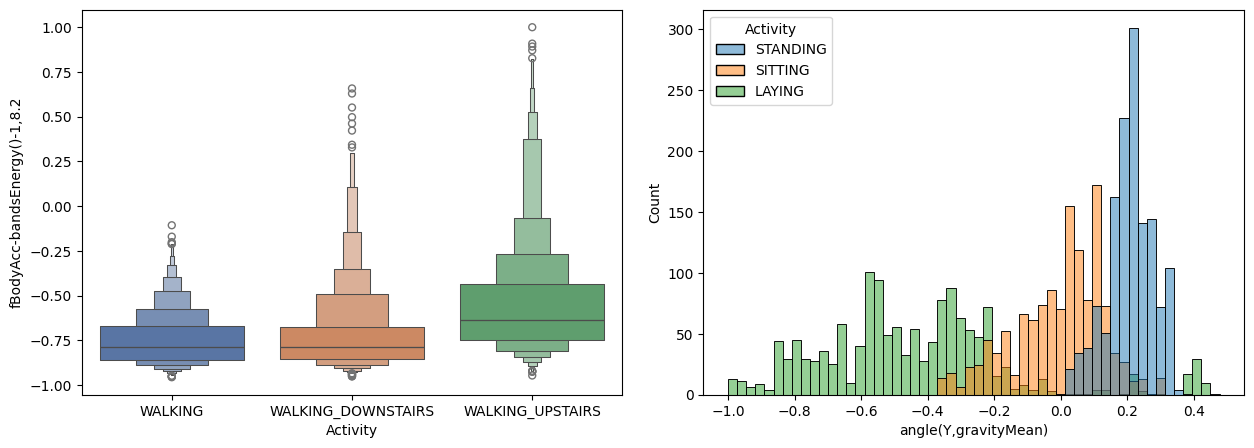

In [29]:

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
plt.subplots_adjust(wspace=0.15)
sns.boxenplot(x="Activity", y="fBodyAcc-bandsEnergy()-1,8.2", data=train,order=['WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS'], ax=axs[0], palette="deep")
sns.histplot(data=train, x="angle(Y,gravityMean)",hue="Activity",hue_order=['STANDING', 'SITTING', 'LAYING'],ax=axs[1])
plt.show()

#на первом графике выделяется активность WALKING_UPSTAIRS так как разброс значений самый большой
# на втором графике выделяется активность STANDING так как ее значния сильно сконцентрированы от 0 до 0.35


### Задание 13 (0.5 балла)

Не всегда жизнь будет такой легкой, а данные будут полностью или почти линейно разделимы в одному признаку (иначе чем бы занимались дата саентисты...). Часто данные вообще ни по одному признаку нельзя адекватно разделить (да и по комбинациям признаков тоже). Давайте попробуем взять не один признак, а целых два!

Рассмотрим только статические активности. Будет снова два графика сразу. На первом графике будет боксплот распределения `fBodyAcc-skewness()-X` по активностям. А на втором попробуем взять не все наблюдения данной группы активностей, а только их часть. Разделимы ли категории по `fBodyAcc-skewness()-X`? А если взять только те строки, где `fBodyAcc-skewness()-X < -0.376`, и теперь вывести боксплот распределения `angle(Y,gravityMean)` по разным активностям? Попробуйте и напишите, выделилась ли какая-то категория?

Вам может пригодиться:
- plt.subplots или matplotlib.gridspec
- sns.boxplot

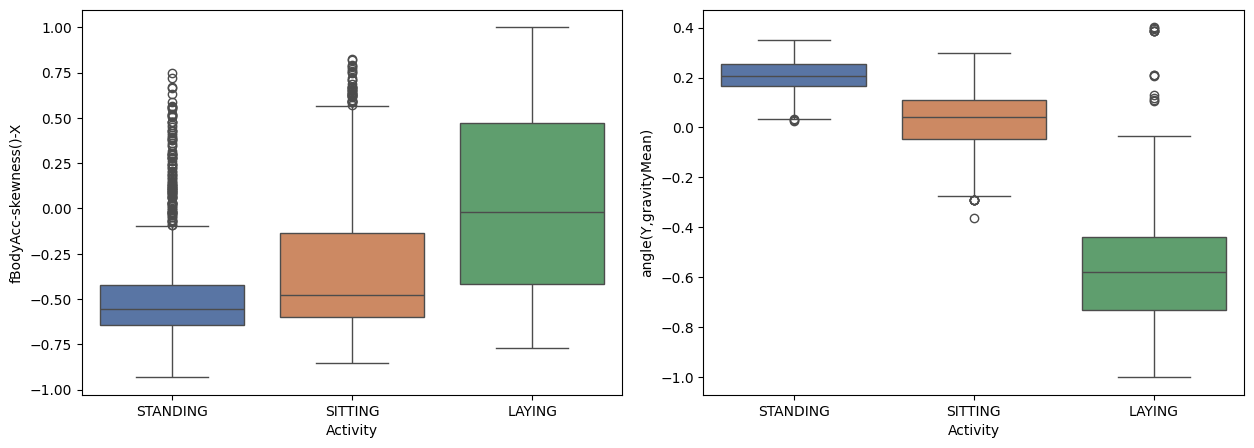

In [30]:
train_new=train[train["fBodyAcc-skewness()-X"] < -0.376]

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
plt.subplots_adjust(wspace=0.15)

sns.boxplot(x="Activity", y="fBodyAcc-skewness()-X", data=train,order=['STANDING', 'SITTING', 'LAYING'], ax=axs[0],palette="deep")
sns.boxplot(x="Activity", y='angle(Y,gravityMean)', data=train_new,order=['STANDING', 'SITTING', 'LAYING'], ax=axs[1],palette="deep")

plt.show()
# на первом графике выделяется категория Laying так как у нее самый большой разброс значений(наибольший прямоугольник)
# на втором графике также выделяется LAYING у нее самый большой разброс значений(наибольший прямоугольник

Поздравляем, теперь вы на шажок ближе к тому, чтобы стать решающим деревом!

### Задание 14 (1 балл)

Вот и осталась лишь одна активность, которую мы никак не выделили. Попробуем и ее какими-то порогами отделить от всех остальных. Да, можно было бы сказать, что, раз уж мы выделили 5 из 6 категорий, то все остальное - это и есть последняя категория, но мы не идем легкими путями. Выделить оставшуюсь категорию с хорошим качеством не так уж и просто. Из доступных признаков, сначала посмотрите на распределение `tBodyAcc-max()-X` на динамических активностях (скрипичная диаграмма отлично подойдет).

А теперь спускаем вам порог `tBodyAcc-max()-X < 0.157`. Для таких строк постройте диаграмму рассеяния для признака `tGravityAcc-min()-X`. Да, получается неидеально, но это честная работа. Можно выбрать порог так, чтобы чисто из таблицы с динамическими активностями из строк, где `tBodyAcc-max()-X < 0.157`, выбрать по некоторому порогу для `tGravityAcc-min()-X` строки так, чтобы доля правильных ответов на оставшейся категории была не меньше 83%!

Вам может пригодиться:
- plt.subplots или matplotlib.gridspec
- sns.violinplot
- sns.swarmplot (иногда лучше подходит, чем просто sns.scatterplot)

Обратите внимание, что подписи к осям можно убирать методами plt. Например, если у вас общее название для оси Y для обоих графиков, то можно не подписывать ось Y у второго графика.

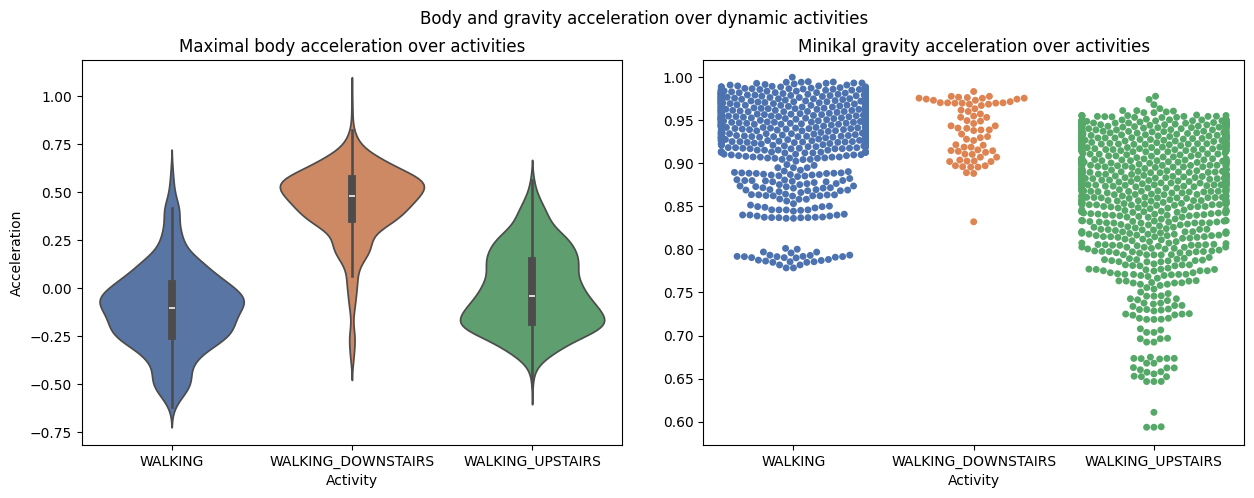

In [31]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

plt.subplots_adjust(wspace=0.15)
fig.suptitle("Body and gravity acceleration over dynamic activities")
train_new=train[train["tBodyAcc-max()-X"] < 0.157]


sns.violinplot(x="Activity", y="tBodyAcc-max()-X", data=train,palette="deep", order=['WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS'],ax=axs[0],split=False)
sns.swarmplot(x="Activity", y='tGravityAcc-min()-X', data=train_new,order=['WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS'], ax=axs[1],palette="deep")
axs[0].set_title('Maximal body acceleration over activities')
axs[1].set_title('Minikal gravity acceleration over activities')
axs[0].set_ylabel('Acceleration')
axs[1].set_ylabel('')

plt.show()

### Задание 15 (0.5 балла)

Теперь попробуем более интерактивные графики. Установите библиотеку `plotly` (обычно `pip install plotly` или `conda install plotly`). Синтаксис очень похож на `seaborn`, но вот [документация для plotly.express](https://plotly.com/python-api-reference/plotly.express.html).

Сначала подготовим данные для визуализации. Будем считать t-SNE просто "черным ящиком", который принимает наши данные и проецирует их в двумерное или трехмерное пространство. Возможно, придется немного подождать.

In [32]:
%%time
from sklearn.manifold import TSNE
tsne = TSNE(random_state=666, n_components=2)
new = tsne.fit_transform(train.drop(['subject', 'Activity'], axis=1))
df_2_comp = pd.concat([
    pd.DataFrame(new, columns=['x', 'y']),
    train['Activity']
], axis=1)

tsne = TSNE(random_state=666, n_components=3)
new = tsne.fit_transform(train.drop(['subject', 'Activity'], axis=1))
df_3_comp = pd.concat([
    pd.DataFrame(new, columns=['x', 'y', 'z']),
    train['Activity']
], axis=1)


CPU times: user 6min 49s, sys: 742 ms, total: 6min 49s
Wall time: 4min 9s


In [33]:
import plotly.express as px

Теперь нарисуйте scatter-график через `plotly.express` для `df_2_comp` с выделением цветами активностей. Красиво получилось? Видны скопления точек одного цвета? Можно разные активности отделить линиями на данном графике?

In [34]:
fig= px.scatter(df_2_comp, x='x', y='y', color='Activity', title='Scatter Plot with Activities')
fig
# да, можно отделить четко laying, а также менее четко sitting и standing, остальные же активности разделить сложно так как точки накладываются друг на друга

Мы не отстаем от трендов и тоже можем в 3D. Сейчас и вы научитесь (если еще не умеете). Нарисуйте scatter_3d-график через `plotly.express` для `df_3_comp` с выделением цветами активностей. Повращайте его. Нормально получилось? Есть ли какая-то структура у точек?

In [35]:
fig2= px.scatter_3d(df_3_comp, x='x', y='y',z='z', color='Activity', title='Scatter Plot with Activities')
fig2
# структура у точек такая же как на 2d графике выше  можно отделить четко laying, а также менее четко sitting и standing, остальные же активности разделить сложно так как точки накладываются друг на друга

### Задание 16 (1 балл)

Мы сделали вам fit. Ваша очередь сделать predict. Допишите функцию, которая принимает на вход датафрейм с признаками, а выдает вектор из предсказаний - для каждой строки датафрейма вы определяете, к какому классу принадлежит объект. Рекомендуем сразу записывать из строками, а не кодировать в числа. Дальше фукнция `accuracy_score` выдаст вам долю правильных ответов.

Подсказка: вы уже отделили категории друг от друга по каким-то признакам. Воспользуйтесь этим знанием! Используя только проведенный вами анализ можно спокойно выбить не менее 75% на train и test! Если вы получите меньше 75%, то балл будет снижен. Авторское решение (на основе всех графиков выше) выбивает 81% и 77% на train и test соответственно. [Шапргалка с готовыми идеями для такой задачи](https://www.youtube.com/watch?v=dQw4w9WgXcQ)

In [36]:
def predict(df: pd.DataFrame):
    # ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ your code here
    a=[0]*df.shape[0]
    for index, row in df.iterrows():
      if row['tBodyAccMag-mean()']>=-0.5:
        if 0.2<=row["tBodyAcc-max()-X"]<=1:
           a[index] = "WALKING_DOWNSTAIRS"
        elif -0.75<=row["fBodyAcc-bandsEnergy()-1,8.2"]<=1:
          a[index] = "WALKING_UPSTAIRS"
        else:
           a[index] = "WALKING"
      else:
         if 0.1<=row['angle(X,gravityMean)']<=1:
          a[index] = "LAYING"
         elif 0.15<=row["angle(Y,gravityMean)"]<=0.35:
          a[index] = "STANDING"
         else:
          a[index] = "SITTING"

    return a


def accuracy_score(y_true, y_pred) -> float:
    y_true = np.asarray(y_true).reshape(-1, 1)
    y_pred = np.asarray(y_pred).reshape(-1, 1)
    return (y_true == y_pred).mean()

In [37]:
train_preds = predict(train)
test_preds = predict(test)
print(f"Accuracy on train set => {accuracy_score(train['Activity'], train_preds)}")
print(f"Accuracy on test set => {accuracy_score(test['Activity'], test_preds)}")

Accuracy on train set => 0.8059031556039173
Accuracy on test set => 0.7560230743128605


__Место для мема и/или фидбэка__